# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with gradient boosting machines.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os

# code to add to import from optichill folder
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from optichill import bas_filter

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print(glob.glob("../../Plt1/Plt1 m*"))

['../../Plt1\\Plt1 m 2016-11.csv', '../../Plt1\\Plt1 m 2016-12.csv', '../../Plt1\\Plt1 m 2017-01.csv', '../../Plt1\\Plt1 m 2017-02.csv', '../../Plt1\\Plt1 m 2017-03.csv', '../../Plt1\\Plt1 m 2017-04.csv', '../../Plt1\\Plt1 m 2017-05.csv', '../../Plt1\\Plt1 m 2017-06.csv', '../../Plt1\\Plt1 m 2017-07.csv', '../../Plt1\\Plt1 m 2017-08.csv', '../../Plt1\\Plt1 m 2017-09.csv', '../../Plt1\\Plt1 m 2017-10.csv', '../../Plt1\\Plt1 m 2017-11.csv', '../../Plt1\\Plt1 m 2017-12.csv', '../../Plt1\\Plt1 m 2018-01.csv', '../../Plt1\\Plt1 m 2018-02.csv', '../../Plt1\\Plt1 m 2018-03.csv', '../../Plt1\\Plt1 m 2018-04.csv']


In [3]:
new_files_list = []

all_minute_files_list = glob.glob("../../Plt1/Plt1 m*")
for element in all_minute_files_list:
    new_files_name = element.replace('../../Plt1\\', '')
    new_files_list.append(new_files_name)

print(new_files_list)

df = bas_filter.import_and_filter(
    '../../Plt1', new_files_list, '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False
)

['Plt1 m 2016-11.csv', 'Plt1 m 2016-12.csv', 'Plt1 m 2017-01.csv', 'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv', 'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv', 'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv', 'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv', 'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv']
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2016-12.csv']
['../../Plt1\\Plt1 m 2017-01.csv']
['../../Plt1\\Plt1 m 2017-02.csv']
['../../Plt1\\Plt1 m 2017-03.csv']
['../../Plt1\\Plt1 m 2017-04.csv']
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
['../../Plt1\\Plt1 m 2017-08.csv']
['../../Plt1\\Plt1 m 2017-09.csv']
['../../Plt1\\Plt1 m 2017-10.csv']
['../../Plt1\\Plt1 m 2017-11.csv']
['../../Plt1\\Plt1 m 2017-12.csv']
['../../Plt1\\Plt1 m 2018-01.csv']
['../../Plt1\\Plt1 m 2018-02.csv']
['../../Plt1\\Plt1 m 2018-03.csv']
['../../

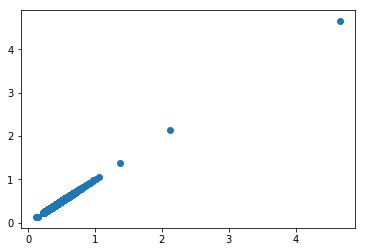

In [4]:
plt.scatter(df['kW/Ton'], df['kW/Ton'])
# plt.xlim(xmax=1.0)
# plt.xlim(xmin=0.2)
# plt.ylim(ymax=1.0)
# plt.ylim(ymin=0.2)

In [5]:
X = df.drop(['kW/Ton'], axis=1).values
Y = df['kW/Ton'].values

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [7]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [8]:
clf = GradientBoostingRegressor(**params)

In [9]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [10]:
y1 = clf.predict(xtest)

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.00572992475959
Mean Squared Error: 9.27286025457e-05
Root Mean Squared Error: 0.00962956917758


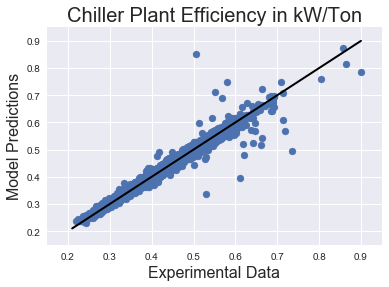

In [47]:
sns.set()
plt.figure()
plt.scatter(ytest, y1)
fs = 20
plt.title("Chiller Plant Efficiency in kW/Ton", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.plot([0.21, 0.9], [0.21, 0.9], 'k-', lw=2)
plt.xlim(xmax=0.95)
plt.ylim(ymax=0.95)
plt.xlim(xmin=0.15)
plt.ylim(ymin=0.15)
plt.savefig('r2_values_plt1.png', bbox_inches='tight')

In [13]:
test_score = r2_score(ytest, y1)
test_score

0.9831690317036359

In [14]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [15]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

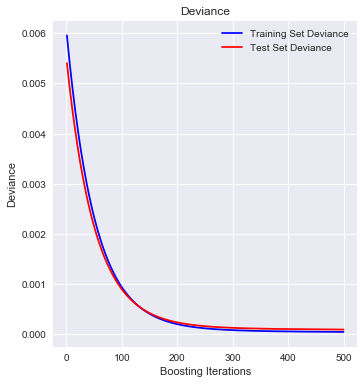

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

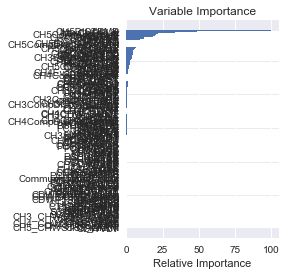

In [17]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [18]:
x = df.columns[sorted_idx]

In [19]:
print(x)

Index(['CDWVLV', 'CH5ALARM', 'CH5_CHWSTSP_Alarm', 'CH4SURGECNT', 'CH4F',
       'CH4ALARM', 'CH4_CHWSTSP_Alarm', 'CH3SURGE', 'CH3F', 'CH3COM1IGV',
       ...
       'CHWST', 'CH5FLA', 'CH5CHWST', 'CH4CHWSTSP', 'CH5DPLift', 'CT5HZ',
       'CH5CondApproach', 'MinCHDPLift', 'MaxCHDPLift', 'CH5DISTEMP'],
      dtype='object', length=192)


In [20]:
print(sorted_idx)

[  0 125 124 121 115  92  91  88  82  71  70  58  57  52  51  49  47  46
 132  44 138 140 189 185 184 182 178 177 176 175 173 171 169 165 163 159
 157 156 150 139  42 191  41   1  15  37  27  12  11  18  19  32  10  39
  86 105 153 154 155  85 126 183 104 190 170  56  87  36 187  54  31 118
 180  34  59 120 167 164  38  40 119 161  83 117  72 106  33  61  63  29
  89  16 110  81   5  77 122  35 113 127  30  28  94 162 107 101  96  60
  90 149  93  62  99  78  97  24  84 114  95  14  74 179  65 109  53  75
  25 181  68 160 111  17 102   4  73  26 116  76  64 166 134 100   6 130
 131  98  67  80 108 168   2 112 128   3 172 146 174 152 129 158  23  13
 137  43  50 188  79  21  55  66 141  48 148 135 123 133   8  69 142 147
   9  45   7 151 136 103 145 186 143  22  20 144]


In [21]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.64555197e-04   3.52144911e-04   3.92211462e-04
   9.53894976e-04   1.10784108e-03

In [22]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [23]:
df_feats.to_csv('Feat_imp_plt1.csv')

How does tree depth affect the r2 values?

In [24]:
pars = np.arange(2, 13, 2)
pars

array([ 2,  4,  6,  8, 10, 12])

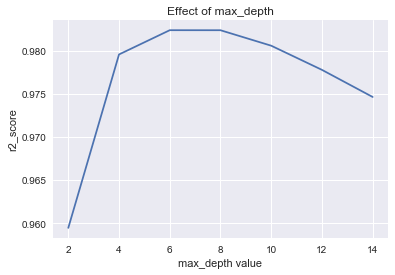

In [25]:
pars = np.arange(2, 15, 2)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, max_depth=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of max_depth")
plt.xlabel("max_depth value")
plt.ylabel("r2_score")
plt.plot(pars, scores)


plt.savefig("max-depth-plot-plt1.png")

How does minimum sample split affect r2 values?

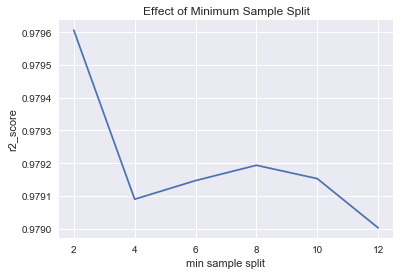

In [26]:
pars = np.arange(2, 13, 2)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'max_depth':4,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, min_samples_split=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of Minimum Sample Split")
plt.xlabel("min sample split")
plt.ylabel("r2_score")
plt.plot(pars, scores)

plt.savefig("min-sam-splt-plot-plt1.png")

How does the number of estimators affect r2 values?

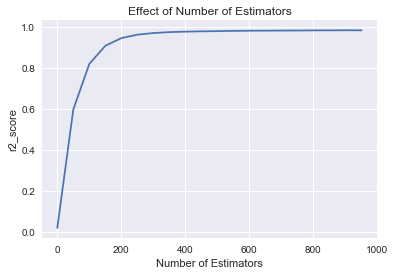

In [27]:
pars = np.arange(1, 1000, 50)

scores = []
for n in pars:
    params1 = {'max_depth':4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, n_estimators=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("r2_score")
plt.plot(pars, scores)


plt.savefig("num-est-plot-plt1.png")